### Data Understanding

#### Importation des librairies

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vacances_scolaires_france import SchoolHolidayDates
import holidays
from dateutil.easter import easter
import calendar
import datetime

%matplotlib inline

# some settings for graphics
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

# use this value where it is possible to indicate the random state
RANDOM_STATE = 42

In [3]:
passagers_df = pd.read_csv("data_passagers.csv")
passagers_df.head(15)

,dateTime,weather,lineNumber,passengersNumber,lineType
0,2019-04-05,26,29,3032,daily
1,2019-04-05,26,42,418,daily
2,2019-04-05,26,40,2065,daily
3,2019-04-05,26,104,115,night
4,2019-04-05,26,27,2900,daily
5,2019-04-05,26,28,13036,daily
6,2019-04-05,26,18,2145,daily
7,2019-04-05,26,41,1319,daily
8,2019-04-05,26,45,1820,daily
9,2019-04-05,26,19,1806,daily


In [10]:
passagers_df["lineType"].unique()

array(['daily', 'night'], dtype=object)

In [21]:
len(passagers_df["weather"].unique())

22

In [19]:
# Conversion de la colonne datetime
#passagers_df['dateTime'] = pd.to_dateTime(passagers_df['dateTime'])

# Extraction de l'année
passagers_df['year'] = passagers_df['dateTime'].dt.year

# Grouper par année et numéro de ligne de bus pour calculer le total des passagers
grouped = passagers_df.groupby(['year', 'lineNumber'])['passengersNumber'].sum().reset_index()



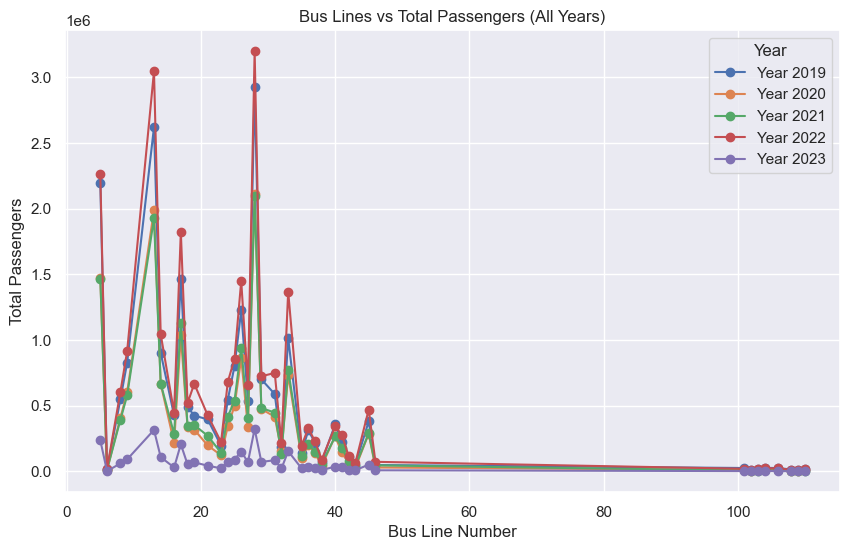

In [18]:
# Tracer un graphique combiné
plt.figure(figsize=(10, 6))  # Taille du graphique

# Boucle sur chaque année pour tracer les données correspondantes
unique_years = grouped['year'].unique()
for year in unique_years:
    # Filtrer les données pour l'année en cours
    year_data = grouped[grouped['year'] == year]
    
    # Tracer les lignes avec une couleur différente pour chaque année
    plt.plot(
        year_data['lineNumber'],
        year_data['passengersNumber'],
        marker='o',
        label=f"Year {year}"
    )

# Personnalisation du graphique
plt.title("Bus Lines vs Total Passengers (All Years)")
plt.xlabel("Bus Line Number")
plt.ylabel("Total Passengers")
plt.legend(title="Year")  # Légende avec un titre
plt.grid(True)

# Afficher le graphique
plt.show()

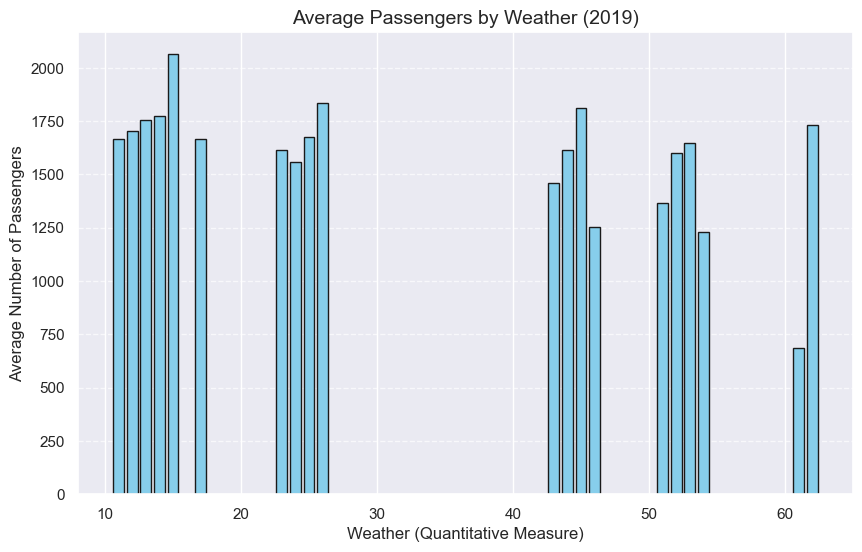

In [26]:
# Filtrer pour l'année 2019
passagers_df_2019 =passagers_df[passagers_df['dateTime'].dt.year == 2020]

# Calculer la moyenne des passagers par météo
weather_passengers =passagers_df_2019.groupby('weather')['passengersNumber'].mean().reset_index()

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(weather_passengers['weather'], weather_passengers['passengersNumber'], color='skyblue', edgecolor='k')

# Personnalisation du graphique
plt.title("Average Passengers by Weather (2019)", fontsize=14)
plt.xlabel("Weather (Quantitative Measure)", fontsize=12)
plt.ylabel("Average Number of Passengers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

In [16]:
#df.groupby("date")["ventes"].sum().reset_index()
passagers_df.groupby("dateTime")["passengersNumber"].sum().reset_index()

,dateTime,passengersNumber
0,2019-04-05,97085
1,2019-04-06,68790
2,2019-04-07,33649
3,2019-04-08,92820
4,2019-04-10,96029
...,...,...
1182,2023-03-15,92501
1183,2023-03-16,98543
1184,2023-03-17,93866
1185,2023-03-18,68811


In [5]:
passagers_df.describe(include = "object")

,dateTime,lineType
count,37621,37621
unique,1187,2
top,2019-04-05,daily
freq,39,34946


In [3]:
passagers_df.describe()

,weather,lineNumber,passengersNumber
count,37621.000000,37621.000000,37621.000000
mean,24.010579,31.744903,2067.940990
std,11.734847,23.335248,2494.733418
min,11.000000,5.000000,1.000000
25%,13.000000,17.000000,365.000000
50%,24.000000,28.000000,1241.000000
75%,26.000000,38.000000,2558.000000
max,62.000000,110.000000,16124.000000


In [4]:
passagers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          37621 non-null  object
 1   weather           37621 non-null  int64 
 2   lineNumber        37621 non-null  int64 
 3   passengersNumber  37621 non-null  int64 
 4   lineType          37621 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [5]:
passagers_df.isna().any()

dateTime            False
weather             False
lineNumber          False
passengersNumber    False
lineType            False
dtype: bool

In [6]:
passagers_df.columns

Index(['dateTime', 'weather', 'lineNumber', 'passengersNumber', 'lineType'], dtype='object')

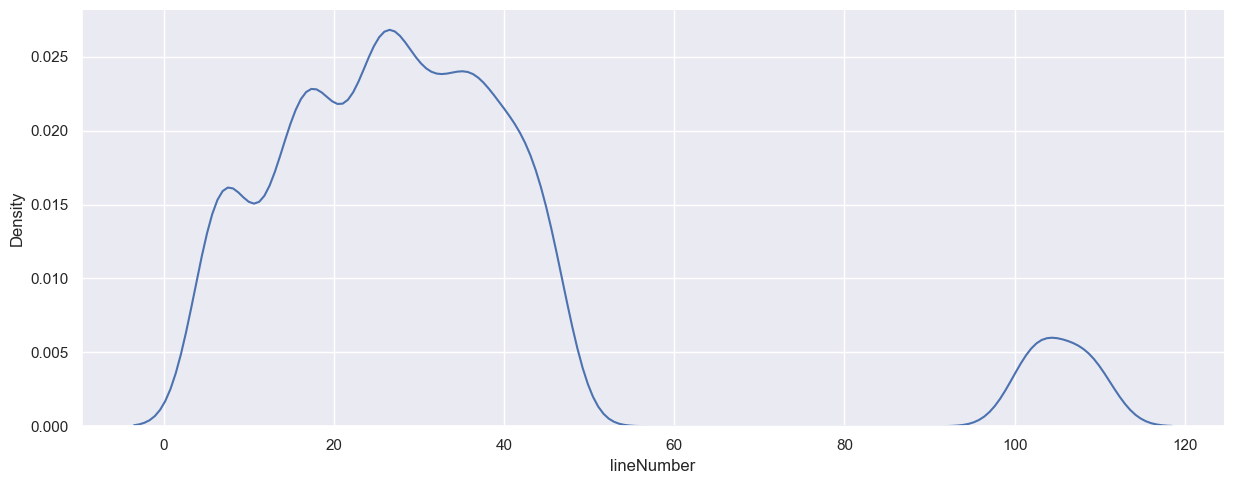

In [7]:
sns.displot(x='lineNumber', data=passagers_df, kind='kde', aspect=2.5)

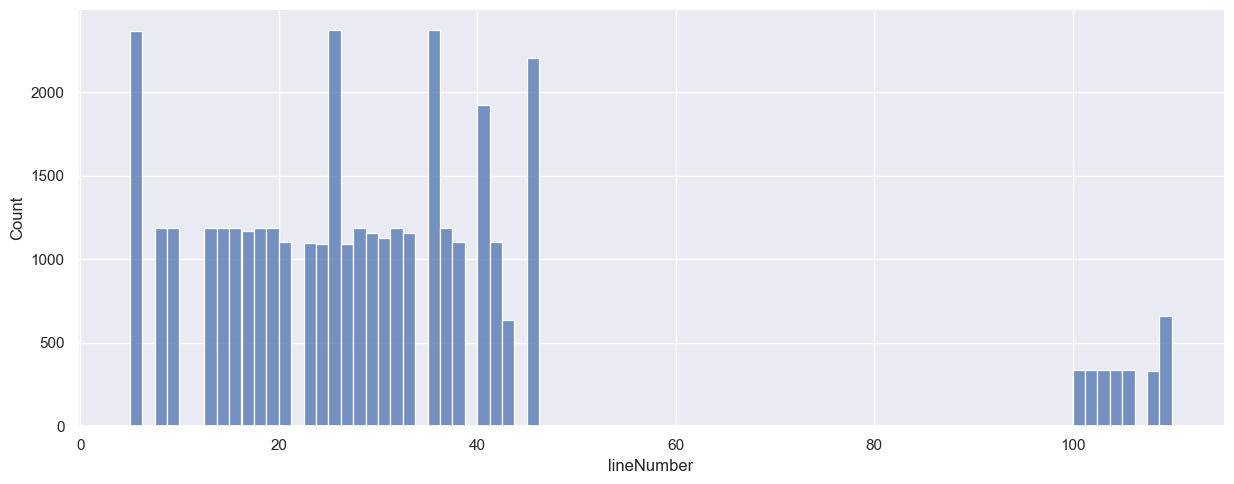

In [19]:
sns.displot(x='lineNumber', data=passagers_df, kind='hist', aspect=2.5)

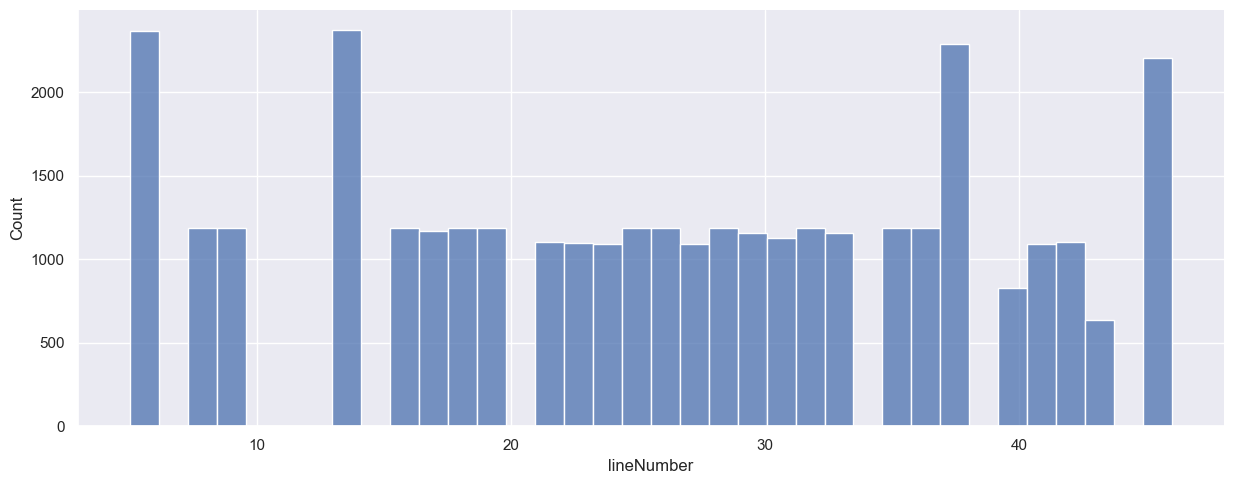

In [8]:
sns.displot(x='lineNumber', data=passagers_df[passagers_df['lineNumber'] < 60], kind='hist', aspect=2.5)

In [6]:
len(passagers_df['lineNumber'].unique())

39

In [8]:
# Conversion de la colonne en type datetime
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])

# Extraction des années uniques
unique_years = passagers_df['dateTime'].dt.year.unique()

# Affichage de la liste des années
print(sorted(unique_years))

[np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023)]


In [10]:



# Conversion en type datetime (si nécessaire)
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])

# Extraction de la date (AAAA-MM-JJ)
passagers_df['date_only'] = passagers_df['dateTime'].dt.date

# Extraction d'autres composantes
passagers_df['year'] = passagers_df['dateTime'].dt.year  # Année
#df['month'] = df['datetime_column'].dt.month  # Mois
#df['day'] = df['datetime_column'].dt.day  # Jour

passagers_df


,dateTime,weather,lineNumber,passengersNumber,lineType,date_only,year
0,2019-04-05,26,29,3032,daily,2019-04-05,2019
1,2019-04-05,26,42,418,daily,2019-04-05,2019
2,2019-04-05,26,40,2065,daily,2019-04-05,2019
3,2019-04-05,26,104,115,night,2019-04-05,2019
4,2019-04-05,26,27,2900,daily,2019-04-05,2019
...,...,...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily,2023-03-19,2023
37617,2023-03-19,26,31,905,daily,2023-03-19,2023
37618,2023-03-19,26,36,425,daily,2023-03-19,2023
37619,2023-03-19,26,41,273,daily,2023-03-19,2023


In [15]:
passagers_df['year'].unique()

array([2019, 2020, 2021, 2022, 2023], dtype=int32)

### Visualisation

In [22]:
passagers_df.columns

Index(['dateTime', 'weather', 'lineNumber', 'passengersNumber', 'lineType',
       'date_only', 'year'],
      dtype='object')

In [23]:
passagers_df.head()

,dateTime,weather,lineNumber,passengersNumber,lineType,date_only,year
0,2019-04-05,26,29,3032,daily,2019-04-05,2019
1,2019-04-05,26,42,418,daily,2019-04-05,2019
2,2019-04-05,26,40,2065,daily,2019-04-05,2019
3,2019-04-05,26,104,115,night,2019-04-05,2019
4,2019-04-05,26,27,2900,daily,2019-04-05,2019


year
2019     8596
2020     8792
2021     7730
2022    11451
2023     1052
Name: passengersNumber, dtype: int64

In [107]:
resyear = passagers_df.groupby('year').agg(total_passenger=('passengersNumber', 'sum'))
resyear

,total_passenger
year,
2019,21111151
2020,14663240
2021,15280654
2022,24216762
2023,2526201


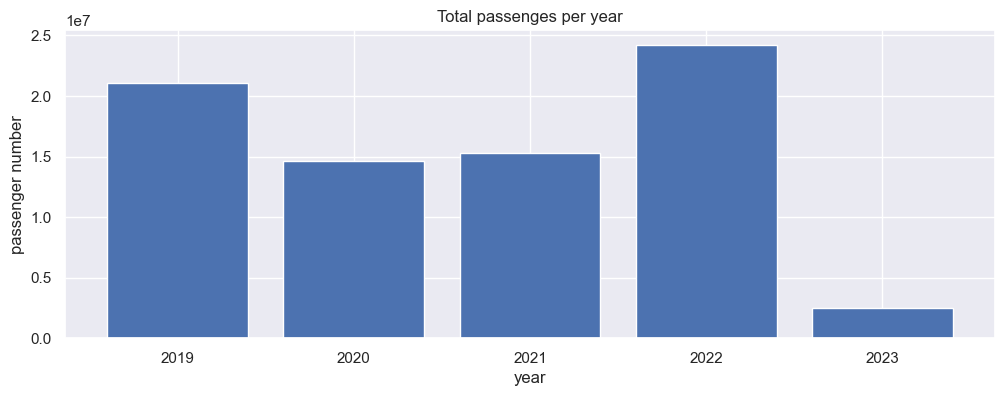

In [108]:
fig, axs = plt.subplots(1,1,figsize=(12, 4))

axs.bar(resyear.index, resyear.total_passenger)
axs.set_title('Total passenges per year')
axs.set_xlabel('year')
axs.set_ylabel('passenger number')
plt.show()

In [86]:
passagers_df['month'] = passagers_df['dateTime'].dt.month
passagers_df.head()

,dateTime,weather,lineNumber,passengersNumber,lineType,date_only,year,month
0,2019-04-05,26,29,3032,daily,2019-04-05,2019,4
1,2019-04-05,26,42,418,daily,2019-04-05,2019,4
2,2019-04-05,26,40,2065,daily,2019-04-05,2019,4
3,2019-04-05,26,104,115,night,2019-04-05,2019,4
4,2019-04-05,26,27,2900,daily,2019-04-05,2019,4


In [111]:
passagers_df.loc[passagers_df['dateTime'].dt.year == 2023, 'month'].unique()

array([2, 3], dtype=int32)

In [112]:
res2019 = passagers_df.loc[passagers_df['dateTime'].dt.year == 2019, ].groupby('month').agg(total_passenger=('passengersNumber', 'sum'))
res2019

,total_passenger
month,
4,1758114
5,2485487
6,1765393
7,2458607
8,2568710
9,2489239
10,2602059
11,2487465
12,2496077


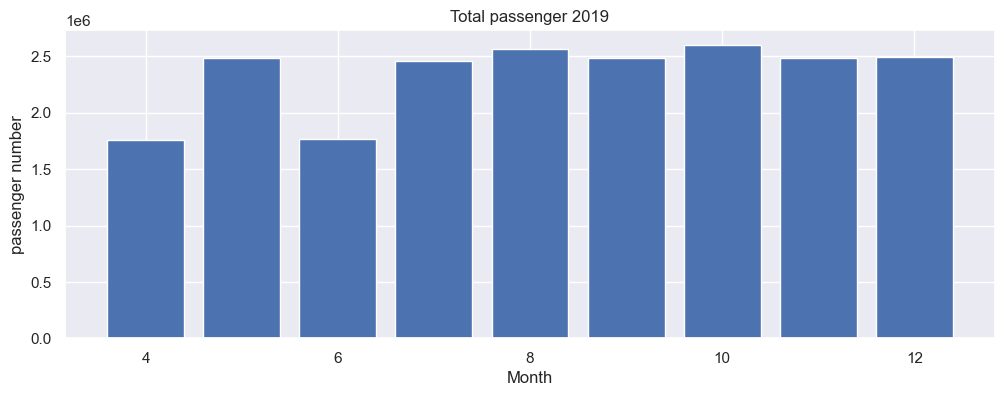

In [114]:
fig, axs = plt.subplots(1,1,figsize=(12, 4))

axs.bar(res2019.index, res2019.total_passenger)
axs.set_title('Total passenger 2019')
axs.set_xlabel('Month')
axs.set_ylabel('passenger number')
plt.show()

In [ ]:
passagers_df.loc[passagers_df['dateTime'].dt.year == 2019, ].groupby('year').agg(total_passenger=('passengersNumber', 'size'))
resyear

In [97]:
resline = passagers_df.groupby('lineNumber').agg(total_passenger=('passengersNumber', 'size'))
resline

,total_passenger
lineNumber,
5,1187
6,1182
8,1187
9,1187
13,1187
14,1187
16,1187
17,1168
18,1187


In [ ]:
resline.sort_values(by = "total_passenger", ascending=False)

,total_passenger
lineNumber,
5,1187
8,1187
9,1187
14,1187
13,1187
16,1187
18,1187
36,1187
19,1187


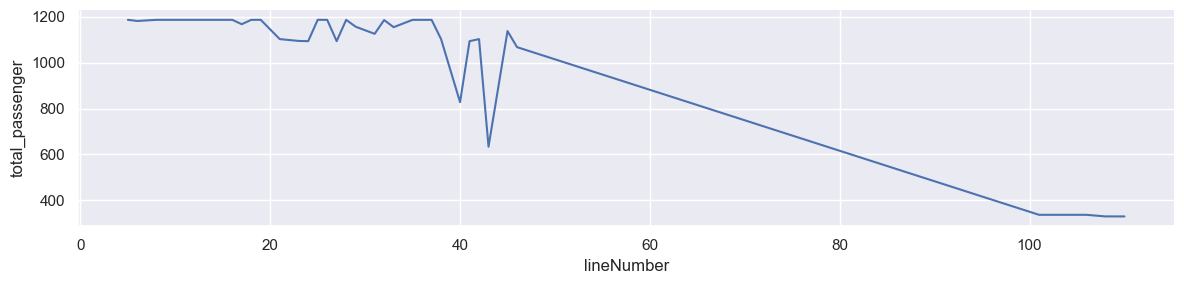

In [104]:
sns.relplot(data=resline, x='lineNumber', y='total_passenger', kind='line', height=3, aspect=4)
plt.show()

In [102]:
resline.loc[resline['total_passenger'] > 1000, ]

,total_passenger
lineNumber,
5,1187
6,1182
8,1187
9,1187
13,1187
14,1187
16,1187
17,1168
18,1187


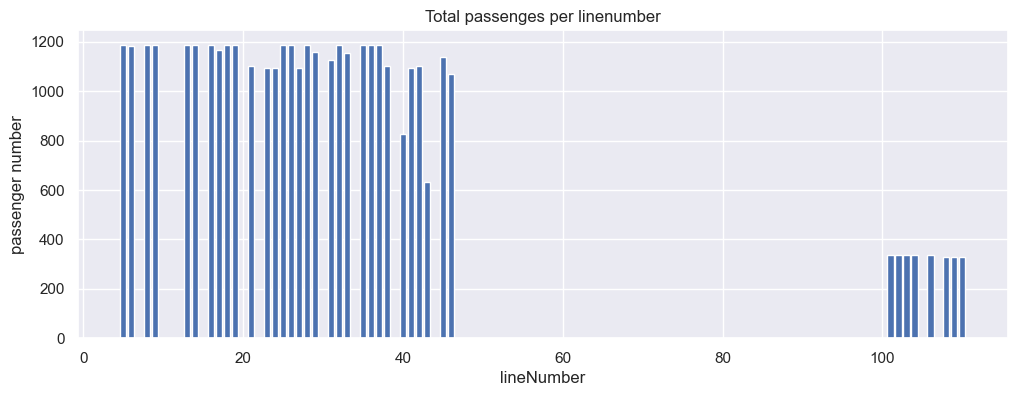

In [41]:
fig, axs = plt.subplots(1,1,figsize=(12, 4))

axs.bar(resline.index, resline.total_passenger)
axs.set_title('Total passenges per linenumber')
axs.set_xlabel('lineNumber')
axs.set_ylabel('passenger number')
plt.show()

In [45]:
reslinetype = passagers_df.groupby('lineType').agg(total_passenger=('passengersNumber', 'size'))
reslinetype

,total_passenger
lineType,
daily,34946
night,2675


In [48]:
reslinetype.index

Index(['daily', 'night'], dtype='object', name='lineType')

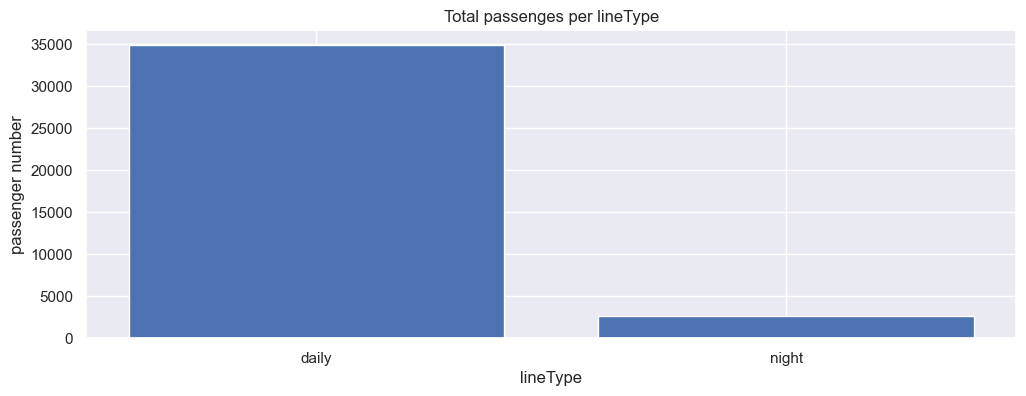

In [50]:
fig, axs = plt.subplots(1,1,figsize=(12, 4))

axs.bar(reslinetype.index, reslinetype.total_passenger)
axs.set_title('Total passenges per lineType')
axs.set_xlabel('lineType')
axs.set_ylabel('passenger number')
plt.show()

In [51]:
passagers_df.head()

,dateTime,weather,lineNumber,passengersNumber,lineType,date_only,year
0,2019-04-05,26,29,3032,daily,2019-04-05,2019
1,2019-04-05,26,42,418,daily,2019-04-05,2019
2,2019-04-05,26,40,2065,daily,2019-04-05,2019
3,2019-04-05,26,104,115,night,2019-04-05,2019
4,2019-04-05,26,27,2900,daily,2019-04-05,2019


In [95]:
sorted(list(set(passagers_df['lineNumber'])))

[5,
 6,
 8,
 9,
 13,
 14,
 16,
 17,
 18,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 45,
 46,
 101,
 102,
 103,
 104,
 106,
 108,
 109,
 110]

In [57]:
yearpass = list(sorted(set(passagers_df['year'])))
yearpass

[2019, 2020, 2021, 2022, 2023]

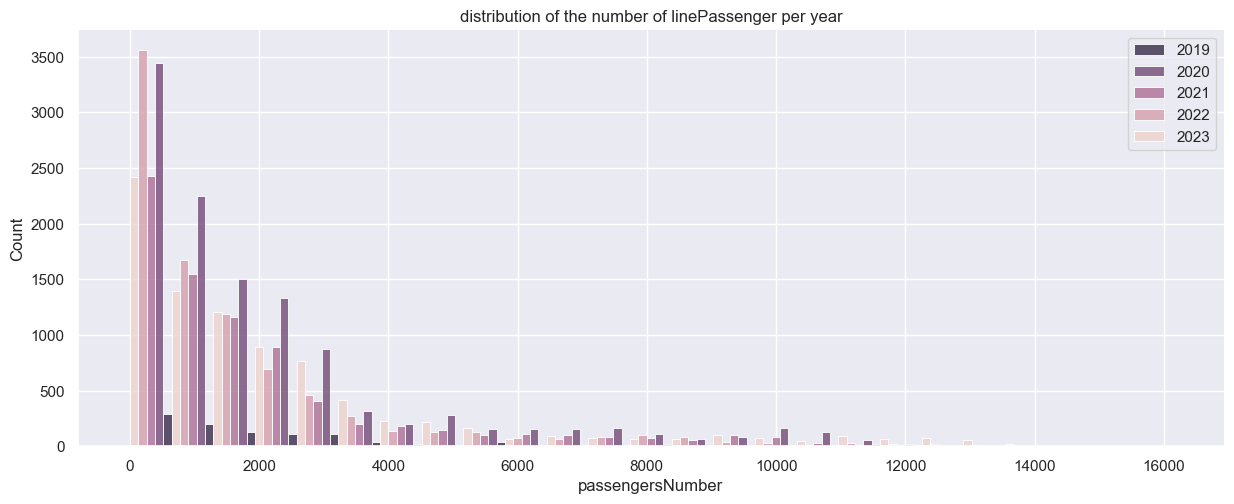

In [59]:
sns.displot(x='passengersNumber', data=passagers_df, hue='year', hue_order=yearpass, aspect=2.5, bins = 25, multiple='dodge', legend=False)
plt.title('distribution of the number of linePassenger per year')
plt.legend(yearpass, loc='upper right')
plt.show()

In [61]:
passagers_df.columns

Index(['dateTime', 'weather', 'lineNumber', 'passengersNumber', 'lineType',
       'date_only', 'year'],
      dtype='object')

In [78]:
passagers_df.loc[passagers_df['dateTime'].dt.year == 2019, ]

,dateTime,weather,lineNumber,passengersNumber,lineType,date_only,year
0,2019-04-05,26,29,3032,daily,2019-04-05,2019
1,2019-04-05,26,42,418,daily,2019-04-05,2019
2,2019-04-05,26,40,2065,daily,2019-04-05,2019
3,2019-04-05,26,104,115,night,2019-04-05,2019
4,2019-04-05,26,27,2900,daily,2019-04-05,2019
...,...,...,...,...,...,...,...
8591,2019-12-31,15,5,6687,daily,2019-12-31,2019
8592,2019-12-31,15,26,3928,daily,2019-12-31,2019
8593,2019-12-31,15,19,1408,daily,2019-12-31,2019
8594,2019-12-31,15,25,2129,daily,2019-12-31,2019


In [74]:
passagers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dateTime          37621 non-null  datetime64[ns]
 1   weather           37621 non-null  int64         
 2   lineNumber        37621 non-null  int64         
 3   passengersNumber  37621 non-null  int64         
 4   lineType          37621 non-null  object        
 5   date_only         37621 non-null  object        
 6   year              37621 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(2)
memory usage: 1.9+ MB


In [75]:
passagers_df['dateTime'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
37616    2023
37617    2023
37618    2023
37619    2023
37620    2023
Name: dateTime, Length: 37621, dtype: int32

In [77]:
passagers_df.loc[passagers_df['dateTime'].dt.year == 2019, ]

,dateTime,weather,lineNumber,passengersNumber,lineType,date_only,year
0,2019-04-05,26,29,3032,daily,2019-04-05,2019
1,2019-04-05,26,42,418,daily,2019-04-05,2019
2,2019-04-05,26,40,2065,daily,2019-04-05,2019
3,2019-04-05,26,104,115,night,2019-04-05,2019
4,2019-04-05,26,27,2900,daily,2019-04-05,2019
...,...,...,...,...,...,...,...
8591,2019-12-31,15,5,6687,daily,2019-12-31,2019
8592,2019-12-31,15,26,3928,daily,2019-12-31,2019
8593,2019-12-31,15,19,1408,daily,2019-12-31,2019
8594,2019-12-31,15,25,2129,daily,2019-12-31,2019


In [130]:
passagers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateTime           37621 non-null  datetime64[ns]
 1   weather            37621 non-null  int64         
 2   lineNumber         37621 non-null  int64         
 3   passengersNumber   37621 non-null  int64         
 4   lineType           37621 non-null  object        
 5   year               37621 non-null  int32         
 6   dateTimeMonth      37621 non-null  int32         
 7   dateTimeDay        37621 non-null  int32         
 8   dateTimeWeek       37621 non-null  UInt32        
 9   day_of_year        37621 non-null  int64         
 10  dateTimeDayofweek  37621 non-null  object        
 11  dateTimeIs_sunday  37621 non-null  int64         
 12  is_holiday         37621 non-null  bool          
dtypes: UInt32(1), bool(1), datetime64[ns](1), int32(3), int64(5),

### Ajout de variables dans notre DataFrame

In [136]:
# Conversion en type datetime
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])

# Jours fériés en France
fr_holidays = holidays.France()
d  =  SchoolHolidayDates () 

# Extraction d'autres composantes
# datetimemonth: le jour du mois
# dateTimeday: le jour de l'annee
passagers_df['year'] = passagers_df['dateTime'].dt.year  # Année
passagers_df['dateTimeMonth'] = passagers_df['dateTime'].dt.month  # Mois
passagers_df['dateTimeDay'] = passagers_df['dateTime'].dt.day  # Jour

# Extraire le numéro de la semaine
passagers_df['dateTimeWeek'] = passagers_df['dateTime'].dt.isocalendar().week

# Extraire le jour de l'annee (1 to 365)
passagers_df['day_of_year'] = passagers_df['dateTime'].apply(lambda x: x.timetuple().tm_yday)

# Extraire le jour de la semaine
passagers_df['dateTimeDayofweek'] = passagers_df['dateTime'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Dimanche ou non
passagers_df['dateTimeIs_sunday'] = passagers_df['dateTime'].dt.dayofweek.apply(lambda x: 1 if x == 6 else 0)

# Jour ferie oui ou non 
passagers_df['is_holiday'] = passagers_df['dateTime'].dt.date.isin(fr_holidays)

# Vacances scolaires oui ou non
# Extraire les années présentes dans le DataFrame
years = passagers_df['year'].unique()

# Obtenir les dates des vacances scolaires pour chaque année et les combiner
school_holidays = SchoolHolidayDates()
vacation_days = set()
i = 0
for dat in passagers_df['dateTime']:
    holidays = school_holidays.is_holiday_for_zone(datetime.date(dat.year,dat.month,dat.day), "A")
    # Ajouter une colonne indiquant si la date est un jour de vacances scolaires
    passagers_df.loc[i, 'dateTimeIs_schoolholiday'] = holidays
    i+=1
# Jour de paque ou non
# Calculer les dates de Pâques pour chaque année et créer un dictionnaire
easter_dates = {year: easter(year) for year in years}

# Ajouter une colonne indiquant si la date est un jour de Pâques
passagers_df['dateTimeIs_paques'] = passagers_df['dateTime'].dt.date.apply(lambda x: x == easter_dates.get(x.year))
#

#Grande semaine 
# Calculer les plages de la "Grande Semaine" pour chaque année
semana_santa_ranges = {
    year: pd.date_range(start=easter(year) - pd.Timedelta(days=7), end=easter(year)).date
    for year in years
}

# Ajouter une colonne indiquant si la date est dans la "Grande Semaine"
passagers_df['dateTimeIs_grandsemaine '] = passagers_df['dateTime'].dt.date.apply(
    lambda x: x in semana_santa_ranges.get(x.year, [])
)

passagers_df


,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine
0,2019-04-05,26,29,3032,daily,2019,4,5,14,95,Friday,0,False,False,False,False
1,2019-04-05,26,42,418,daily,2019,4,5,14,95,Friday,0,False,False,False,False
2,2019-04-05,26,40,2065,daily,2019,4,5,14,95,Friday,0,False,False,False,False
3,2019-04-05,26,104,115,night,2019,4,5,14,95,Friday,0,False,False,False,False
4,2019-04-05,26,27,2900,daily,2019,4,5,14,95,Friday,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily,2023,3,19,11,78,Sunday,1,False,False,False,False
37617,2023-03-19,26,31,905,daily,2023,3,19,11,78,Sunday,1,False,False,False,False
37618,2023-03-19,26,36,425,daily,2023,3,19,11,78,Sunday,1,False,False,False,False
37619,2023-03-19,26,41,273,daily,2023,3,19,11,78,Sunday,1,False,False,False,False


#### Ajout Variable issus du nombre de passager

In [137]:
passagers_df.head()

,dateTime,weather,lineNumber,passengersNumber,lineType,year,dateTimeMonth,dateTimeDay,dateTimeWeek,day_of_year,dateTimeDayofweek,dateTimeIs_sunday,is_holiday,dateTimeIs_schoolholiday,dateTimeIs_paques,dateTimeIs_grandsemaine
0,2019-04-05,26,29,3032,daily,2019,4,5,14,95,Friday,0,False,False,False,False
1,2019-04-05,26,42,418,daily,2019,4,5,14,95,Friday,0,False,False,False,False
2,2019-04-05,26,40,2065,daily,2019,4,5,14,95,Friday,0,False,False,False,False
3,2019-04-05,26,104,115,night,2019,4,5,14,95,Friday,0,False,False,False,False
4,2019-04-05,26,27,2900,daily,2019,4,5,14,95,Friday,0,False,False,False,False


In [35]:
# Conversion en type datetime
passagers_df['dateTime'] = pd.to_datetime(passagers_df['dateTime'])

# Calculer le total des passagers par date
aggregated_df = passagers_df.groupby("dateTime")["passengersNumber"].mean().reset_index()

# Ajouter les colonnes de décalage
aggregated_df["nbPassenger_lag1"] = aggregated_df["passengersNumber"].shift(7)
aggregated_df["nbPassenger_lag2"] = aggregated_df["passengersNumber"].shift(14)
aggregated_df["nbPassenger_lag3"] = aggregated_df["passengersNumber"].shift(21)

# Remplacer les valeurs manquantes par la moyenne de chaque colonne
for col in ["nbPassenger_lag1", "nbPassenger_lag2", "nbPassenger_lag3"]:
    aggregated_df[col].fillna(aggregated_df[col].mean(), inplace=True)

# Joindre les données décalées au DataFrame initial
passagers_df = passagers_df.merge(aggregated_df, on="dateTime", how="left")

passagers_df

C:\Users\noume\AppData\Local\Temp\ipykernel_11180\3994279875.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_df[col].fillna(aggregated_df[col].mean(), inplace=True)


,dateTime,weather,lineNumber,passengersNumber_x,lineType,passengersNumber_y,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3
0,2019-04-05,26,29,3032,daily,2489.358974,2033.290131,2030.836553,2028.429444
1,2019-04-05,26,42,418,daily,2489.358974,2033.290131,2030.836553,2028.429444
2,2019-04-05,26,40,2065,daily,2489.358974,2033.290131,2030.836553,2028.429444
3,2019-04-05,26,104,115,night,2489.358974,2033.290131,2030.836553,2028.429444
4,2019-04-05,26,27,2900,daily,2489.358974,2033.290131,2030.836553,2028.429444
...,...,...,...,...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily,1438.241379,1258.448276,1280.103448,1075.551724
37617,2023-03-19,26,31,905,daily,1438.241379,1258.448276,1280.103448,1075.551724
37618,2023-03-19,26,36,425,daily,1438.241379,1258.448276,1280.103448,1075.551724
37619,2023-03-19,26,41,273,daily,1438.241379,1258.448276,1280.103448,1075.551724


In [36]:
passagers_df

,dateTime,weather,lineNumber,passengersNumber_x,lineType,passengersNumber_y,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3
0,2019-04-05,26,29,3032,daily,2489.358974,2033.290131,2030.836553,2028.429444
1,2019-04-05,26,42,418,daily,2489.358974,2033.290131,2030.836553,2028.429444
2,2019-04-05,26,40,2065,daily,2489.358974,2033.290131,2030.836553,2028.429444
3,2019-04-05,26,104,115,night,2489.358974,2033.290131,2030.836553,2028.429444
4,2019-04-05,26,27,2900,daily,2489.358974,2033.290131,2030.836553,2028.429444
...,...,...,...,...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily,1438.241379,1258.448276,1280.103448,1075.551724
37617,2023-03-19,26,31,905,daily,1438.241379,1258.448276,1280.103448,1075.551724
37618,2023-03-19,26,36,425,daily,1438.241379,1258.448276,1280.103448,1075.551724
37619,2023-03-19,26,41,273,daily,1438.241379,1258.448276,1280.103448,1075.551724


In [39]:
passagers_df["nbPassenger_lag1"].unique()

array([2033.29013143, 2489.35897436, 1859.18918919, ..., 2345.25641026,
       1883.56756757, 1258.44827586], shape=(1173,))

### Ajout des donnees Meteorologiques

In [41]:
dictA = {
    1: "Très pluvieux",
    2: "Pluvieux",
    3: "Très nuageux",
    4: "Partiellement nuageux",
    5:"Ensoleillé"
}

dictB = {
1:["Nuboso con tormenta", "Muy nuboso con nieve escasa", "Nuboso con tormenta y lluvia escasa noche",
    "Nuboso con tormenta y lluvia escasa", "Nuboso con tormenta noche", "Cubierto con nieve escasa",  
    "Muy nuboso con tormenta y lluvia escasa", "Cubierto con lluvia", "Intervalos nubosos con tormenta y lluvia escasa",
      "Cubierto con tormenta y lluvia escasa", "Cubierto con nieve", "Nuboso con nieve noche", "Muy nuboso con tormenta", 
      "Nuboso con nieve",  "Muy nuboso con nieve", "Cubierto con tormenta",  "Intervalos nubosos con tormenta y lluvia escasa noche", 
      "Muy nuboso con lluvia"],
2:["Intervalos nubosos con tormenta noche", "Intervalos nubosos con nieve escasa", "Nuboso con lluvia noche", 
   "Nuboso con lluvia", "Intervalos nubosos con nieve noche", "Cubierto con lluvia escasa", "Intervalos nubosos con nieve", 
   "Intervalos nubosos con tormenta", "Nuboso con nieve escasa", "Intervalos nubosos con nieve escasa noche", 
   "Nuboso con nieve escasa noche", "Muy nuboso con lluvia escasa"],
3:["Intervalos nubosos con lluvia noche", "Intervalos nubosos con lluvia", "Nuboso con lluvia escasa noche", 
   "Nuboso con lluvia escasa", "Muy nuboso", "Nuboso", "Intervalos nubosos con lluvia escasa",  "Cubierto", 
   "Intervalos nubosos con lluvia escasa noche"],
4:["Nuboso noche", "Nubes altas", "Intervalos nubosos", "Intervalos nubosos noche", "Nubes altas noche"],
5:["Despejado", "Poco nuboso", "Despejado noche", "Poco nuboso noche"]
}

dictC = {
12 : "Muy nuboso con lluvia escasa",
13 : "Intervalos nubosos",
43 : "Intervalos nubosos con lluvia escasa",
26 : "Cubierto con lluvia",
25 :  "Muy nuboso con lluvia",
11 :  "Despejado",
62 :  "Nuboso con tormenta y lluvia escasa",
24 : "Nuboso con lluvia",
23 : "Intervalos nubosos con lluvia",
61 : "Intervalos nubosos con tormenta y lluvia escasa",
53 : "Muy nuboso con tormenta",
52 : "Nuboso con tormenta",
51 :  "Intervalos nubosos con tormenta",
17 : "Nubes altas",
44 : "Nuboso con lluvia escasa",
15 : "Muy nuboso",
14 : "Nuboso",
45 : "Muy nuboso con lluvia escasa",
46 : "Cubierto con lluvia escasa",
16 : "Cubierto",
13 : "Intervalos nubosos",
54 : "Cubierto con tormenta"
}

In [75]:
# Parcourir les valeurs de dictC
for k in dictC.values():
    # Vérifier si la valeur k apparaît dans une des listes de dictB
    if any(k in valeurs for valeurs in dictB.values()):
        print(k)
    


Muy nuboso con lluvia escasa
Intervalos nubosos
Intervalos nubosos con lluvia escasa
Cubierto con lluvia
Muy nuboso con lluvia
Despejado
Nuboso con tormenta y lluvia escasa
Nuboso con lluvia
Intervalos nubosos con lluvia
Intervalos nubosos con tormenta y lluvia escasa
Muy nuboso con tormenta
Nuboso con tormenta
Intervalos nubosos con tormenta
Nubes altas
Nuboso con lluvia escasa
Muy nuboso
Nuboso
Muy nuboso con lluvia escasa
Cubierto con lluvia escasa
Cubierto
Cubierto con tormenta


In [62]:
# Parcourir les valeurs de dictC
for k in dictC.values():
    v = 0
    for i in dictB.values():   
        if k in i:
            print(list(dictB.keys())[v])
        v+=1


2
4
3
1
1
5
1
2
3
1
1
1
2
4
3
3
3
2
2
3
1


In [67]:
dictC[12]

'Muy nuboso con lluvia escasa'

In [68]:
for i in passagers_df["weather"]:
    v = 0
    for k in dictB.values():
        if dictC[i] in k:
            passagers_df["Dweather"] = dictA[v]
        else:
            passagers_df["Dweather"] = ""

        v+=1
    

KeyError: 0

In [69]:
# Ajouter une nouvelle colonne vide pour Dweather
passagers_df["Dweather"] = ""

# Parcourir chaque ligne du DataFrame
for index, row in passagers_df.iterrows():
    weather_key = row["weather"]  # Clé de weather dans dictC

    # Vérifier si la clé existe dans dictC
    if weather_key in dictC:
        weather_value = dictC[weather_key]  # Obtenir la valeur associée

        # Trouver dans dictB où cette valeur correspond
        for key, values in dictB.items():
            if weather_value in values:
                # Associer à la bonne valeur de dictA
                passagers_df.at[index, "Dweather"] = dictA[key]
                break  # Arrêter la recherche dès qu'une correspondance est trouvée


In [70]:
passagers_df

,dateTime,weather,lineNumber,passengersNumber_x,lineType,passengersNumber_y,nbPassenger_lag1,nbPassenger_lag2,nbPassenger_lag3,Dweather
0,2019-04-05,26,29,3032,daily,2489.358974,2033.290131,2030.836553,2028.429444,Très pluvieux
1,2019-04-05,26,42,418,daily,2489.358974,2033.290131,2030.836553,2028.429444,Très pluvieux
2,2019-04-05,26,40,2065,daily,2489.358974,2033.290131,2030.836553,2028.429444,Très pluvieux
3,2019-04-05,26,104,115,night,2489.358974,2033.290131,2030.836553,2028.429444,Très pluvieux
4,2019-04-05,26,27,2900,daily,2489.358974,2033.290131,2030.836553,2028.429444,Très pluvieux
...,...,...,...,...,...,...,...,...,...,...
37616,2023-03-19,26,26,2650,daily,1438.241379,1258.448276,1280.103448,1075.551724,Très pluvieux
37617,2023-03-19,26,31,905,daily,1438.241379,1258.448276,1280.103448,1075.551724,Très pluvieux
37618,2023-03-19,26,36,425,daily,1438.241379,1258.448276,1280.103448,1075.551724,Très pluvieux
37619,2023-03-19,26,41,273,daily,1438.241379,1258.448276,1280.103448,1075.551724,Très pluvieux


In [76]:
passagers_df["Dweather"].unique()

array(['Très pluvieux', 'Très nuageux', 'Pluvieux',
       'Partiellement nuageux', 'Ensoleillé', ''], dtype=object)